## Test Working with Google Drive Files

In [1]:
from pathlib import Path

import plotly.express as px
import ibis
import pandas as pd

In [2]:
# Set up data directory
data_dir = Path.cwd().parents[0] / "data"
data_dir

WindowsPath('C:/Users/cdpet/Documents/Data Collab Projects/Dash Test App/dash-test-app/data')

### CSV

#### Load CSV

In [3]:
# df = pd.read_csv(Path("/data/playoff_teams_df.csv"))
df = pd.read_csv(data_dir / "playoff_teams_df.csv")

In [4]:
df.head()

,2021-22,2020-21,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,...,2005-06,2004-05,2003-04,2002-03,2001-02,2000-01,1999-00,1998-99,1997-98,1996-97
0,Boston Celtics,Milwaukee Bucks,Los Angeles Lakers,Toronto Raptors,Golden State Warriors,Golden State Warriors,Cleveland Cavaliers,Golden State Warriors,San Antonio Spurs,Miami Heat,...,Miami Heat,San Antonio Spurs,Detroit Pistons,San Antonio Spurs,Los Angeles Lakers,Los Angeles Lakers,Los Angeles Lakers,San Antonio Spurs,Chicago Bulls,Chicago Bulls
1,Golden State Warriors,Phoenix Suns,Miami Heat,Golden State Warriors,Cleveland Cavaliers,Cleveland Cavaliers,Golden State Warriors,Cleveland Cavaliers,Miami Heat,San Antonio Spurs,...,Dallas Mavericks,Detroit Pistons,Los Angeles Lakers,New Jersey Nets,New Jersey Nets,Philadelphia 76ers,Indiana Pacers,New York Knicks,Utah Jazz,Utah Jazz
2,Miami Heat,Atlanta Hawks,Boston Celtics,Milwaukee Bucks,Houston Rockets,Boston Celtics,Oklahoma City Thunder,Houston Rockets,Indiana Pacers,Indiana Pacers,...,Detroit Pistons,Miami Heat,Indiana Pacers,Dallas Mavericks,Sacramento Kings,Milwaukee Bucks,Portland Trail Blazers,Indiana Pacers,Indiana Pacers,Houston Rockets
3,Milwaukee Bucks,LA Clippers,Denver Nuggets,Portland Trail Blazers,Boston Celtics,San Antonio Spurs,Toronto Raptors,Atlanta Hawks,Oklahoma City Thunder,Memphis Grizzlies,...,Phoenix Suns,Phoenix Suns,Minnesota Timberwolves,Detroit Pistons,Boston Celtics,San Antonio Spurs,New York Knicks,Portland Trail Blazers,Los Angeles Lakers,Miami Heat
4,Philadelphia 76ers,Brooklyn Nets,Toronto Raptors,Philadelphia 76ers,New Orleans Pelicans,Washington Wizards,Miami Heat,Los Angeles Clippers,Washington Wizards,Golden State Warriors,...,Los Angeles Clippers,Seattle SuperSonics,New Jersey Nets,Sacramento Kings,Dallas Mavericks,Charlotte Hornets,Miami Heat,Utah Jazz,Charlotte Hornets,New York Knicks


### Sqlite DB
- the test database is *hawaii.sqlite*

#### Load DB using Ibis (SQLAlchemy Alternative)

In [5]:
# An option Ibis recommends while developing
ibis.options.interactive = True

In [6]:
# Connect to the local database using the sqlite backend
# db = ibis.sqlite.connect(Path("hawaii.sqlite"))
db = ibis.sqlite.connect(data_dir / "hawaii.sqlite")

In [7]:
tables = db.list_tables()
tables

['measurement', 'station']

##### Measurement Table

In [8]:
# `measurement` is a Table instance
measurement = db.table("measurement")
measurement.info()

                 Summary of measurement                 
                       19550 rows                       
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ Name    ┃ Type                   ┃ # Nulls ┃ % Nulls ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ id      │ Int32(nullable=False)  │       0 │    0.00 │
│ station │ String(nullable=True)  │       0 │    0.00 │
│ date    │ String(nullable=True)  │       0 │    0.00 │
│ prcp    │ Float64(nullable=True) │    1447 │    7.40 │
│ tobs    │ Float64(nullable=True) │       0 │    0.00 │
└─────────┴────────────────────────┴─────────┴─────────┘


In [9]:
# Use `execute()` to turn the Table into a pandas DataFrame
measurement = measurement.execute()
measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


##### Station Table

In [10]:
# `station` is a Table instance
station = db.table("station")
station.info()

                    Summary of station                    
                          9 rows                          
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ Name      ┃ Type                   ┃ # Nulls ┃ % Nulls ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ id        │ Int32(nullable=False)  │       0 │    0.00 │
│ station   │ String(nullable=True)  │       0 │    0.00 │
│ name      │ String(nullable=True)  │       0 │    0.00 │
│ latitude  │ Float64(nullable=True) │       0 │    0.00 │
│ longitude │ Float64(nullable=True) │       0 │    0.00 │
│ elevation │ Float64(nullable=True) │       0 │    0.00 │
└───────────┴────────────────────────┴─────────┴─────────┘


In [11]:
# Use `execute()` to turn the Table into a pandas DataFrame
station = station.execute()
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


#### Write to DB

In [12]:
measurement["month"] = pd.DatetimeIndex(measurement["date"]).month_name()
measurement["day"] = pd.DatetimeIndex(measurement["date"]).day

In [13]:
measurement.drop("date", axis=1, inplace=True)

In [15]:
meas_jun = measurement[(measurement["month"] == "June")]
meas_dec = measurement[(measurement["month"] == "December")]

In [16]:
meas_dec.head()

,id,station,prcp,tobs,month,day
305,306,USC00519397,0.04,76.0,December,1
306,307,USC00519397,0.00,74.0,December,3
307,308,USC00519397,0.00,74.0,December,4
308,309,USC00519397,0.00,64.0,December,6
309,310,USC00519397,0.00,64.0,December,7


In [17]:
mean_jun = meas_jun.groupby(by="day")[["prcp", "tobs"]].mean()
mean_dec = meas_dec.groupby(by="day")[["prcp", "tobs"]].mean()

In [18]:
mean_jun["month"] = "Jun"
mean_dec["month"] = "Dec"

In [19]:
mean_jun = mean_jun.reset_index()
mean_dec = mean_dec.reset_index()

In [30]:
mean_jun.join(mean_dec, how="right", lsuffix="_jun", rsuffix="_dec")

,day_jun,prcp_jun,tobs_jun,month_jun,day_dec,prcp_dec,tobs_dec,month_dec
0,1.0,0.076667,75.035714,Jun,1,0.110435,72.400000,Dec
1,2.0,0.069167,74.962963,Jun,2,0.214348,71.925926,Dec
2,3.0,0.206923,74.833333,Jun,3,0.138750,73.464286,Dec
3,4.0,0.286000,74.678571,Jun,4,0.153333,73.192308,Dec
4,5.0,0.318846,75.750000,Jun,5,0.073913,71.769231,Dec
5,6.0,0.026923,76.100000,Jun,6,0.049130,70.259259,Dec
6,7.0,0.028800,76.103448,Jun,7,0.018095,70.346154,Dec
7,8.0,0.018750,76.000000,Jun,8,0.045417,70.592593,Dec
8,9.0,0.020000,76.322581,Jun,9,0.134167,72.964286,Dec
9,10.0,0.050690,75.862069,Jun,10,0.492308,72.035714,Dec


In [20]:
mean_jun_dec = pd.concat([mean_jun, mean_dec], ignore_index=True)

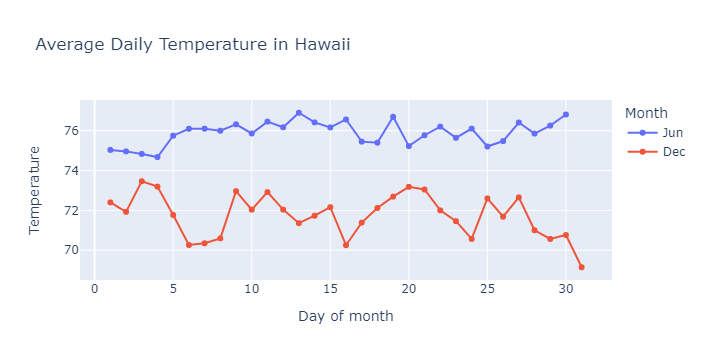

In [26]:
fig = px.line(
    data_frame=mean_jun_dec,
    x="day",
    y="tobs",
    title="Average Daily Temperature in Hawaii",
    color="month",
    markers=True,
    labels={"day": "Day of month", "month": "Month", "tobs": "Temperature"},
)
fig.show()

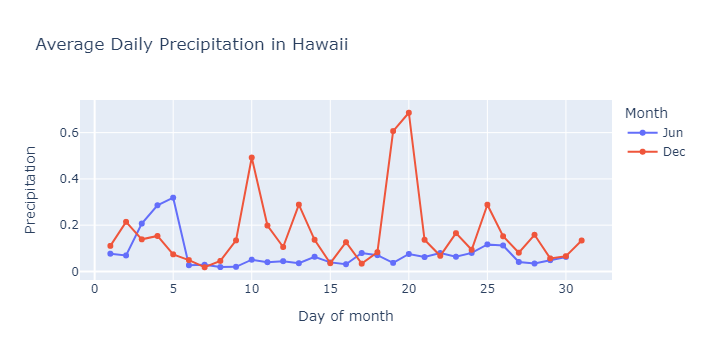

In [27]:
fig = px.line(
    data_frame=mean_jun_dec,
    x="day",
    y="prcp",
    title="Average Daily Precipitation in Hawaii",
    color="month",
    markers=True,
    labels={"day": "Day of month", "month": "Month", "prcp": "Precipitation"},
)
fig.show()